# Gaussian stateの光子数測定

Gaussian stateは通常、直交位相成分$\hat{x}, \hat{p}$を変数にもつ多変数ガウス分布で記述されるため、状態を知るにはホモダイン測定を行う方が自然に思えます。  
photonqatにもMeasureX, MeasurePとして実装しています。

Gaussian stateに対して光子数測定を行いたくなる理由は以下の通りです。

1つはGaussian Boson Samplingというスキームです。  
Gaussian stateに対し光子数測定を行った場合に、ある光子数が測定結果として得られる確率はHafnianという関数で計算されます。  
Hafnianは既存のアルゴリズムでは計算量が指数関数的増加するため、Gaussian Boson Samplingによって計算の加速が期待されています。  
Hafnianはグラフ理論におけるPerfect Matchingの計算などと深い関係があるようです。

もう1つは、ユニバーサルな光量子計算を行うために提案されているスキームの1つとしてのガウス操作と光子数測定の組み合わせです。  
こちらは最近ニュースになった古澤研の量子もつれ状態を用いたユニバーサル量子コンピューティングと関係しています。

Gaussian Boson SamplingはカナダのXanadu社が近年研究を推し進めており、複数の関連論文とthe Walrus(https://the-walrus.readthedocs.io/en/latest/index.html) というライブラリを公開しています。  

photonqatへのGaussian stateに対する光子数測定の実装も、彼らが論文(arXiv:1905.07011 [quant-ph] )として公開しているアイデア、定式に則っています。

In [2]:
import photonqat as pq

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

## Photonqat

基本的なゲート操作と光子数測定を行った後、2モードの光子数が(0, 0)である確率を計算しています。

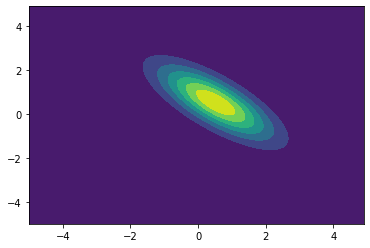

mu0 = [0.5202601 0.5202601]
cov = [[ 1.19054892 -0.9067151 ]
 [-0.9067151   1.19054892]]
Probability of photon number [0 0] :  0.5695892908718674


In [4]:
G = pq.Gaussian(2) # two qumode [0, 1]
G.D(0, 2) # Displacement gate
G.S(0, 1) # X squeeIng gate, r=1
G.R(0, np.pi/4) # pi/4 rotation gate
G.BS(0, 1, np.pi/4) # 50:50 beam splitter
G.run()
G.Wigner(0) # plot
print('mu0 =', G.mean(0)) # mu of qumode 0
print('cov =', G.cov(0)) # covarince of qumode 1

m = np.array([0, 0]) # measured output of photon number for each mode
prob = G.PhotonDetectionProb(m, m) # probability
print("Probability of photon number", m, ": ", prob)